<a href="https://colab.research.google.com/github/greensky0107/self_study/blob/main/Day30_Classification_Kaggle_Santander_CSatisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step1. Library 불러오기

# Pandas 불러오기
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Numpy 불러오기
import numpy as np

# Matplotlib 불러오기
import matplotlib.pyplot as plt

# Seaborn 불러오기
import seaborn as sns

# 데이터 분리
from sklearn.model_selection import train_test_split

# 모델 불러오기
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
# XGBoost
from xgboost import XGBClassifier

# 평가
# accuracy (정확도)
from sklearn.metrics import accuracy_score
# precision (정밀도)
from sklearn.metrics import precision_score
# recall (재현율)
from sklearn.metrics import recall_score
# f1
from sklearn.metrics import f1_score
# roc auc
from sklearn.metrics import roc_auc_score

In [ ]:
#Step2 Dataset 가져와서 확인및 전처리  (colab/content/kaggle_santander_customer_satisfaction/train.csv로 저장. 경로복사함)

cust_df = pd.read_csv("/content/kaggle_santander_customer_satisfaction/train.csv")
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
#Step 2 Dataset 가져와서 확인및 전처리 (111 실수,  260 정수, null 없음)

cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
#Step 2 Dataset 가져와서 확인및 전처리 (Target의 값 분포 알아보기.  unsatisfied(=1) 비율은 4%)

print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [ ]:
#Step 2 Dataset 가져와서 확인및 전처리 (Feature(column)의 값 분포 확인 :  var3의 min이 이상.)

cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
#Step 2 Dataset 가져와서 확인및 전처리 (var3의 min 을 count해봐서 가장 많은 값이 무엇인지 확인)

cust_df['var3'].value_counts()

,count
var3,
2,74165
8,138
-999999,116
9,110
3,108
...,...
63,1
194,1
40,1


In [ ]:
#Step 2 Dataset 가져와서 확인및 전처리 (var3의 min 을 count해봐서 가장 많은 값이 무엇인지 확인)

# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
# 이거 왜할까?
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [ ]:
#Step 3 Dataset을 train vs. test로 분리

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [ ]:
#Step 3 Dataset을 train vs. test로 분리

# X_train, y_train을 다시 학습과 검증 데이터 세트로 분리.
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                                    test_size=0.2, random_state=0)

[XGBoost Model - Evaluation with ROC&AUC]

In [132]:
#Step4 Model을 XGBoost 정해서 학습하고 ROC AUC로 평가하기

# n_estimators는 500으로, learning_rate 0.05, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
# early_stopping_rounds is moved to the XGBClassifier constructor.
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05, random_state=0, early_stopping_rounds=100)
# eval_metric is specified within eval_set
xgb_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

# train:test=80:20, n_nestimators=500, learning_rate=0.05, random_state=0 => ROC AUC 0.8446

[0]	validation_0-logloss:0.21359	validation_1-logloss:0.21326
[1]	validation_0-logloss:0.20852	validation_1-logloss:0.20840
[2]	validation_0-logloss:0.20378	validation_1-logloss:0.20385
[3]	validation_0-logloss:0.19928	validation_1-logloss:0.19957
[4]	validation_0-logloss:0.19507	validation_1-logloss:0.19556
[5]	validation_0-logloss:0.19110	validation_1-logloss:0.19182
[6]	validation_0-logloss:0.18737	validation_1-logloss:0.18827
[7]	validation_0-logloss:0.18388	validation_1-logloss:0.18495
[8]	validation_0-logloss:0.18059	validation_1-logloss:0.18178
[9]	validation_0-logloss:0.17747	validation_1-logloss:0.17885
[10]	validation_0-logloss:0.17455	validation_1-logloss:0.17607
[11]	validation_0-logloss:0.17179	validation_1-logloss:0.17345
[12]	validation_0-logloss:0.16916	validation_1-logloss:0.17101
[13]	validation_0-logloss:0.16670	validation_1-logloss:0.16869
[14]	validation_0-logloss:0.16437	validation_1-logloss:0.16652
[15]	validation_0-logloss:0.16215	validation_1-logloss:0.16449
[1

In [135]:
#Step5 XGBoost의  Hyperparameter Tuning을 위해 최적값 찾기

from hyperopt import hp

# max_depth는 5에서 15까지 1간격으로, min_child_weight는 1에서 6까지 1간격으로
# colsample_bytree는 0.5에서 0.95사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색.

xgb_search_space = {'max_depth': hp.quniform('max_depth', 5, 15, 1),
                    'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
                    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 0.95),
                    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# 목적 함수 설정.
# 추후 fmin()에서 입력된 search_space값으로 XGBClassifier 교차 검증 학습 후 -1* roc_auc 평균 값을 반환.
def objective_func(search_space):
    # eval_metric and early_stopping_rounds are moved to the XGBClassifier constructor
    xgb_clf = XGBClassifier(n_estimators=100,
                            max_depth=int(search_space['max_depth']),
                            min_child_weight=int(search_space['min_child_weight']),
                            colsample_bytree=search_space['colsample_bytree'],
                            learning_rate=search_space['learning_rate'],
                            eval_metric='auc',  # Specify eval_metric here
                            early_stopping_rounds=30 # Specify early_stopping_rounds here
                           )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list= []

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        #  추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        # Removed early_stopping_rounds from fit()
        xgb_clf.fit(X_tr, y_tr,
                   eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1 * np.mean(roc_auc_list)

from hyperopt import fmin, tpe, Trials

trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('best:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[35]	validation_0-auc:0.91306	validation_1-auc:0.83514
[36]	validation_0-auc:0.91411	validation_1-auc:0.83473
[37]	validation_0-auc:0.91444	validation_1-auc:0.83492
[38]	validation_0-auc:0.91468	validation_1-auc:0.83462
[39]	validation_0-auc:0.91515	validation_1-auc:0.83401
[40]	validation_0-auc:0.91526	validation_1-auc:0.83418
[41]	validation_0-auc:0.91540	validation_1-auc:0.83409
[42]	validation_0-auc:0.91609	validation_1-auc:0.83382
[43]	validation_0-auc:0.91642	validation_1-auc:0.83337
[44]	validation_0-auc:0.91755	validation_1-auc:0.83371
[0]	validation_0-auc:0.82893	validation_1-auc:0.79630
[1]	validation_0-auc:0.84185	validation_1-auc:0.81151
[2]	validation_0-auc:0.83892	validation_1-auc:0.81016
[3]	validation_0-auc:0.84844	validation_1-auc:0.81883
[4]	validation_0-auc:0.85049	validation_1-auc:0.82190
[5]	validation_0-auc:0.85235	validation_1-auc:0.82399
[6]	validation_0-auc:0.85587	validation_1-auc:0.82399
[7]	validation_0-auc:0.85787	validat

In [136]:
#Step 6 최적값으로 Tuning 실시후 재평가

# n_estimators를 100으로 설정 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행.
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=round(best['learning_rate'], 7),
                        max_depth=int(best['max_depth']), min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'], 5),
                        eval_metric="auc",  # Move eval_metric here
                        early_stopping_rounds=100  # Move early_stopping_rounds here
                       )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행.
# Remove eval_metric and early_stopping_rounds from fit()
xgb_clf.fit(X_tr, y_tr,
            eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

# ROC AUC 0.8458 로 상승

[0]	validation_0-auc:0.83045	validation_1-auc:0.80645
[1]	validation_0-auc:0.83974	validation_1-auc:0.81870
[2]	validation_0-auc:0.84078	validation_1-auc:0.81272
[3]	validation_0-auc:0.84938	validation_1-auc:0.82092
[4]	validation_0-auc:0.85063	validation_1-auc:0.82243
[5]	validation_0-auc:0.85195	validation_1-auc:0.82649
[6]	validation_0-auc:0.85325	validation_1-auc:0.82755
[7]	validation_0-auc:0.85389	validation_1-auc:0.82722
[8]	validation_0-auc:0.85439	validation_1-auc:0.82783
[9]	validation_0-auc:0.85543	validation_1-auc:0.82861
[10]	validation_0-auc:0.85612	validation_1-auc:0.82910
[11]	validation_0-auc:0.85650	validation_1-auc:0.82989
[12]	validation_0-auc:0.85704	validation_1-auc:0.82973
[13]	validation_0-auc:0.85759	validation_1-auc:0.82963
[14]	validation_0-auc:0.85790	validation_1-auc:0.83023
[15]	validation_0-auc:0.85846	validation_1-auc:0.83092
[16]	validation_0-auc:0.85894	validation_1-auc:0.83188
[17]	validation_0-auc:0.85936	validation_1-auc:0.83268
[18]	validation_0-au

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

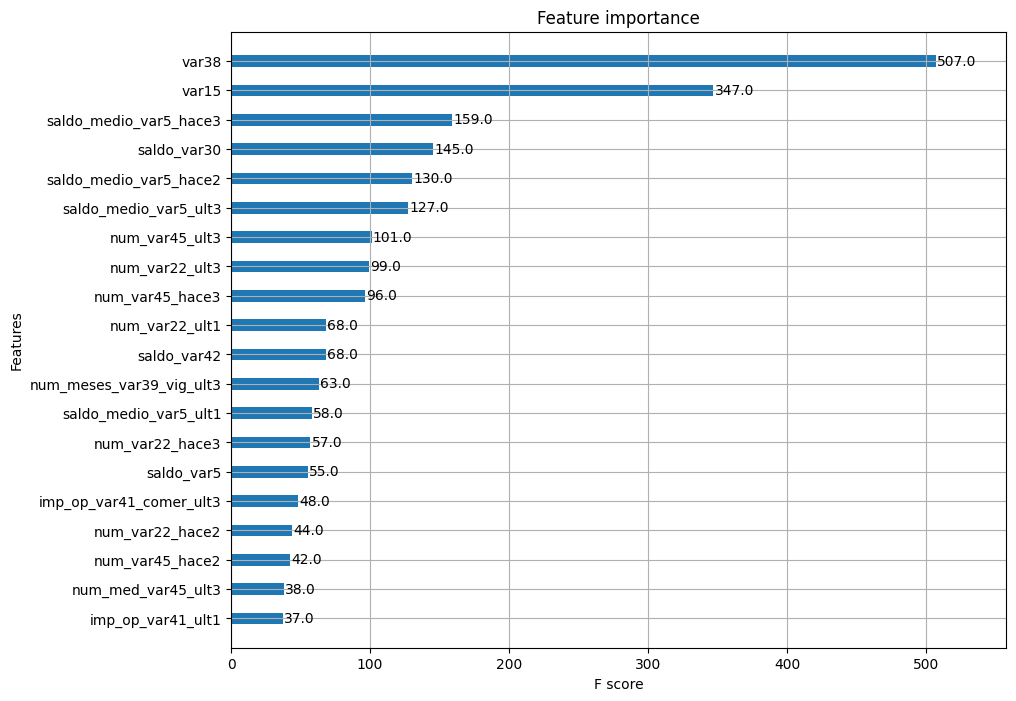

In [137]:
# Extra :  XGBoost에서 중요한 feature는 var38 & var15
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

[Light GBM Model - Evaluation with ROC&AUC]

In [138]:
#Step4 Light GBM Model 정해서 학습하고 ROC AUC로 평가하기
# n_estimators=500으로, early_stopping_rounds=100 으로 XGBoost와 동일하게 설정

from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

# 모델 정의
# verbose is moved to the LGBMClassifier constructor
lgbm_clf = LGBMClassifier(n_estimators=500, early_stopping_rounds=100, verbose=10,random_state=42)

# 평가셋 정의
eval_set = [(X_val, y_val)]

# 모델 학습
lgbm_clf.fit(
    X_tr, y_tr,
    eval_set=eval_set,
    eval_metric='auc',
  )

# 테스트셋에 대한 ROC AUC 계산
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1])
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 1902, number of negative: 46750
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.953648
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.903329
[LightGBM] [Debug] init for col-wise cost 0.093764 seconds, init for row-wise cost 0.121402 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 13745
[LightGBM] [Info] Number of data points in the train set: 48652, number of used features: 248
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=10

In [146]:
#Step5 XGBooster의  Hyperparameter Tuning을 위해 최적값 찾기

!pip install hyperopt
from hyperopt import hp, fmin, tpe, Trials
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier

lgbm_search_space = {'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
                     'max_depth': hp.quniform('max_depth', 100, 160, 1),
                     'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
                     'subsample': hp.uniform('subsample', 0.7, 1),
                     'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
                    }

def objective_func(search_space):
    # early_stopping_rounds is moved to the LGBMClassifier constructor
    lgbm_clf =  LGBMClassifier(n_estimators=100, num_leaves=int(search_space['num_leaves']),
                               max_depth=int(search_space['max_depth']),
                               min_child_samples=int(search_space['min_child_samples']),
                               subsample=search_space['subsample'],
                               learning_rate=search_space['learning_rate'],
                               early_stopping_rounds=30 # Specify early_stopping_rounds here
                               )
    # 3개 k-fold 방식으로 평가된 roc_auc 지표를 담는 list
    roc_auc_list = []

    # 3개 k-fold방식 적용
    kf = KFold(n_splits=3)
    # X_train을 다시 학습과 검증용 데이터로 분리
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index값으로 학습과 검증 데이터 세트 분리
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행.
        # Removed early_stopping_rounds from fit()
        lgbm_clf.fit(X_tr, y_tr, eval_metric="auc",
           eval_set=[(X_tr, y_tr), (X_val, y_val)])

        # 1로 예측한 확률값 추출후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음.
        score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
        roc_auc_list.append(score)

    # 3개 k-fold로 계산된 roc_auc값의 평균값을 반환하되,
    # HyperOpt는 목적함수의 최소값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환.
    return -1*np.mean(roc_auc_list)


trials = Trials()

# fmin()함수를 호출. max_evals지정된 횟수만큼 반복 후 목적함수의 최소값을 가지는 최적 입력값 추출.
best = fmin(fn=objective_func, space=lgbm_search_space, algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정합니다.
            trials=trials, rstate=np.random.default_rng(seed=30))

print('lgbmbest:', best)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 19
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 20
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 15
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 16
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 18
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 28
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 25
[LightGBM] [Debug] Trained a tree with leaves = 46 and depth = 21
[LightGBM] [Debug] Trained a tree with l

In [158]:
#Step 6 최적값으로 Tuning 실시후 재평가
# n_estimators=500으로, early_stopping_rounds=100 으로 앞에서 한 설정값과 동일하게 설정

lgbm_clf =  LGBMClassifier(n_estimators=500, num_leaves=33,
                           max_depth=119,
                           min_child_samples=69,
                           subsample=round(0.9332360463629378, 5),
                           learning_rate=round(0.04589753644367517, 5),
                           early_stopping_rounds=100,
                           eval_metric="auc"
                          )

# evaluation metric을 auc로, early stopping은 100 으로 설정하고 학습 수행.
# Added X_tr and y_tr as the first two arguments to fit()
lgbm_clf.fit(X_tr, y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1])
print('ROC AUC - LightGBM: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 1902, number of negative: 46750
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.942524
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.881986
[LightGBM] [Debug] init for col-wise cost 0.085698 seconds, init for row-wise cost 0.173144 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 13377
[LightGBM] [Info] Number of data points in the train set: 48652, number of used features: 203
[LightGBM] [Warning] Unknown pa